# Detection and mitigation of biases in AI models.
To demonstrate the practical implementation of AI governance, consider the following Python code example for detecting and mitigating bias in a credit scoring model using the sample credit score dataset.

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# Load dataset
data = pd.read_csv('credit_score_data.csv')

In [47]:
data

,Age,Gender,Income,Credit_History,Loan_Amount,Credit_Score
0,25,Male,50000,1,200000,700
1,45,Female,80000,1,150000,650
2,35,Male,60000,1,250000,720
3,50,Female,100000,0,300000,580
4,23,Female,40000,1,180000,690
5,40,Male,75000,1,230000,710
6,30,Male,55000,0,220000,600
7,28,Female,45000,1,170000,680
8,33,Male,65000,1,240000,705
9,42,Female,85000,0,260000,625


In [4]:
data.columns

Index(['Age', 'Gender', 'Income', 'Credit_History', 'Loan_Amount',
       'Credit_Score'],
      dtype='object')

In [5]:
# Preprocess data
data.isnull().sum()

Age               0
Gender            0
Income            0
Credit_History    0
Loan_Amount       0
Credit_Score      0
dtype: int64

In [6]:
To convert categorical colums to Numerica
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [10]:
data['Gender'] = le.fit_transform(data['Gender'])

In [11]:
data

,Age,Gender,Income,Credit_History,Loan_Amount,Credit_Score
0,25,1,50000,1,200000,700
1,45,0,80000,1,150000,650
2,35,1,60000,1,250000,720
3,50,0,100000,0,300000,580
4,23,0,40000,1,180000,690
5,40,1,75000,1,230000,710
6,30,1,55000,0,220000,600
7,28,0,45000,1,170000,680
8,33,1,65000,1,240000,705
9,42,0,85000,0,260000,625


In [12]:
X = data[['Age', 'Income', 'Credit_History', 'Loan_Amount',
       'Gender']].values

In [13]:
Y = data['Credit_Score']

In [20]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [21]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [24]:
# Predict and evaluate the model
y_pred = model.predict(X_test)

In [26]:
# Assess the performance
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
mape = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
r2 = r2_score(Y_test, y_pred)
print(f'RMSE: {rmse}, MAPE: {mape}, R2 Score: {r2}')

RMSE: 10.970003839975938, MAPE: 1.2985333047778236, R2 Score: 0.8371325025200329


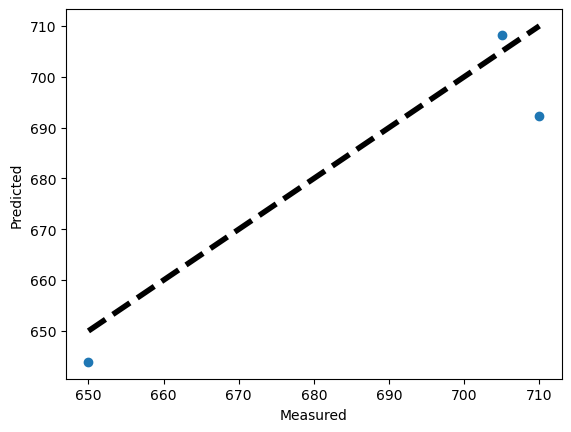

In [27]:
# Draw a residual scatter plot
plt.scatter(Y_test, y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

C:\Users\visit\AppData\Local\Temp\ipykernel_21656\1330287408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-y_pred),bins=1)


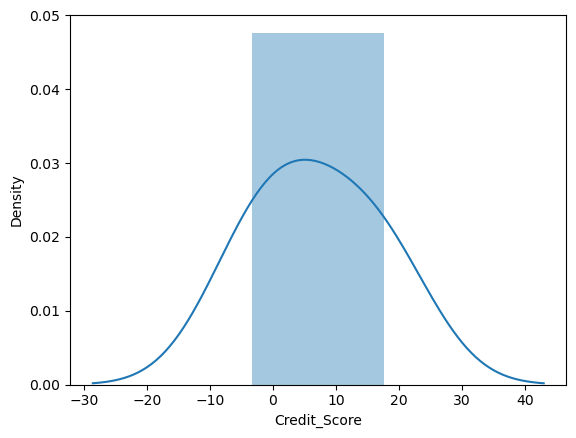

In [40]:
# Draw residual histogram
sns.distplot((Y_test-y_pred),bins=1)
plt.show()

In [41]:
# Detect and mitigate bias
# Example: Check for gender bias
gender_bias = pd.crosstab(data['Credit_Score'], data['Gender'])
("Gender Bias:\n", gender_bias)

# Mitigate bias by adjusting model or using bias mitigation techniques (e.g., reweighing)

('Gender Bias:\n',
 Gender        0  1
 Credit_Score      
 580           1  0
 600           0  1
 625           1  0
 650           1  0
 680           1  0
 690           1  0
 700           0  1
 705           0  1
 710           0  1
 720           0  1)